# AI Project Lifecycle

![AI Lifecycle](./assets/lifecycle.png)


## Step 2: Data Acquisiton for PCB Component Detection

Here, we have gathered data from the following sources, with different types of data:

These datasets have annotated images of PCBs highlighting actual components, this can be used to identify missing components by comparing it with a known good PCB's output. This is also not used as of now.
- pcb-oriented-detection: https://www.kaggle.com/datasets/yuyi1005/pcb-oriented-detection
- pcb-fault-detection: (Very Poor Quality) https://www.kaggle.com/datasets/animeshkumarnayak/pcb-fault-detection
- pcb-component-detection: https://sites.google.com/view/chiawen-kuo/home/pcb-component-detection
- FICS-PCB: https://www.researchgate.net/publication/344475848_FICS-PCB_A_Multi-Modal_Image_Dataset_for_Automated_Printed_Circuit_Board_Visual_Inspection https://trust-hub.org/#/data/fics-pcb also at https://universe.roboflow.com/erl-n2gvo/component-detection-caevk/browse
- PCB-Vision: https://arxiv.org/pdf/2401.06528 https://zenodo.org/records/10617721
- CompDetect Dataset: https://universe.roboflow.com/dataset-lmrsw/compdetect

In [1]:
import numpy as np
import pandas as pd

from pathlib import Path
import xml.etree.ElementTree as  ET
from shutil import copyfile
import os
import os.path as path
import shutil
import pathlib
from pathlib import Path
from tqdm.std import tqdm
import random
import json
import random
import glob
import cv2
import regex as re
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import enum
from enum import Enum, auto

import sys

sys.path.insert(0, "..")
from yolo_visualize import sample_yolo_dataset

In [2]:
COMPONENTS_DATA_DIR = Path("./data")

In [3]:
def sane_mkdir(v):
    if not path.isdir(v):
        os.mkdir(v)

In [4]:
# clear_old_data = True
clear_old_data = False
if clear_old_data and path.exists(COMPONENTS_DATA_DIR):
    shutil.rmtree(COMPONENTS_DATA_DIR)
sane_mkdir(COMPONENTS_DATA_DIR)

In [5]:
DATASET_GROUPS = ["train", "test", "valid"]
for g in DATASET_GROUPS:
    sane_mkdir(COMPONENTS_DATA_DIR / g)
    sane_mkdir(COMPONENTS_DATA_DIR / g / "images")
    sane_mkdir(COMPONENTS_DATA_DIR / g / "labels")

In [7]:
temp_data_path = Path("./temp_data/")
temp_images_path = Path("./temp_images/")

for image_path in tqdm(list(temp_images_path.iterdir())):
    data_path = temp_data_path / (image_path.with_suffix(".json").name)
    with open(data_path) as json_data:
        json_data = json.load(json_data)
    image_data = json_data["image"]
    split = image_data["split"]
    annotations = image_data["annotation"]
    shutil.copyfile(
        image_path, COMPONENTS_DATA_DIR / split / "images" / image_path.name
    )
    width = int(annotations["width"])
    height = int(annotations["height"])
    dw = 1.0 / width
    dh = 1.0 / height

    # Calculate center, width, and height of the bbox in relative dimension
    with open(
        COMPONENTS_DATA_DIR / split / "labels" / (image_path.with_suffix(".txt").name),
        "w",
    ) as f:
        for box in annotations["boxes"]:
            class_name = str(box["label"]).lower()
            class_id = int(class_name[-1])
            x = float(box["x"])
            y = float(box["y"])
            width = float(box["width"])
            height = float(box["height"])
            rel_x_center = x * dw
            rel_y_center = y * dh
            rel_width = width * dw
            rel_height = height * dh
            f.write(
                f"{class_id} {rel_x_center} {rel_y_center} {rel_width} {rel_height}\n"
            )

  0%|          | 0/260 [00:00<?, ?it/s]

100%|██████████| 260/260 [00:08<00:00, 31.22it/s] 


In [6]:
sys.path.insert(0, "..")
from yolo_visualize import sample_yolo_dataset

100%|██████████| 7/7 [00:00<00:00, 12.18it/s]


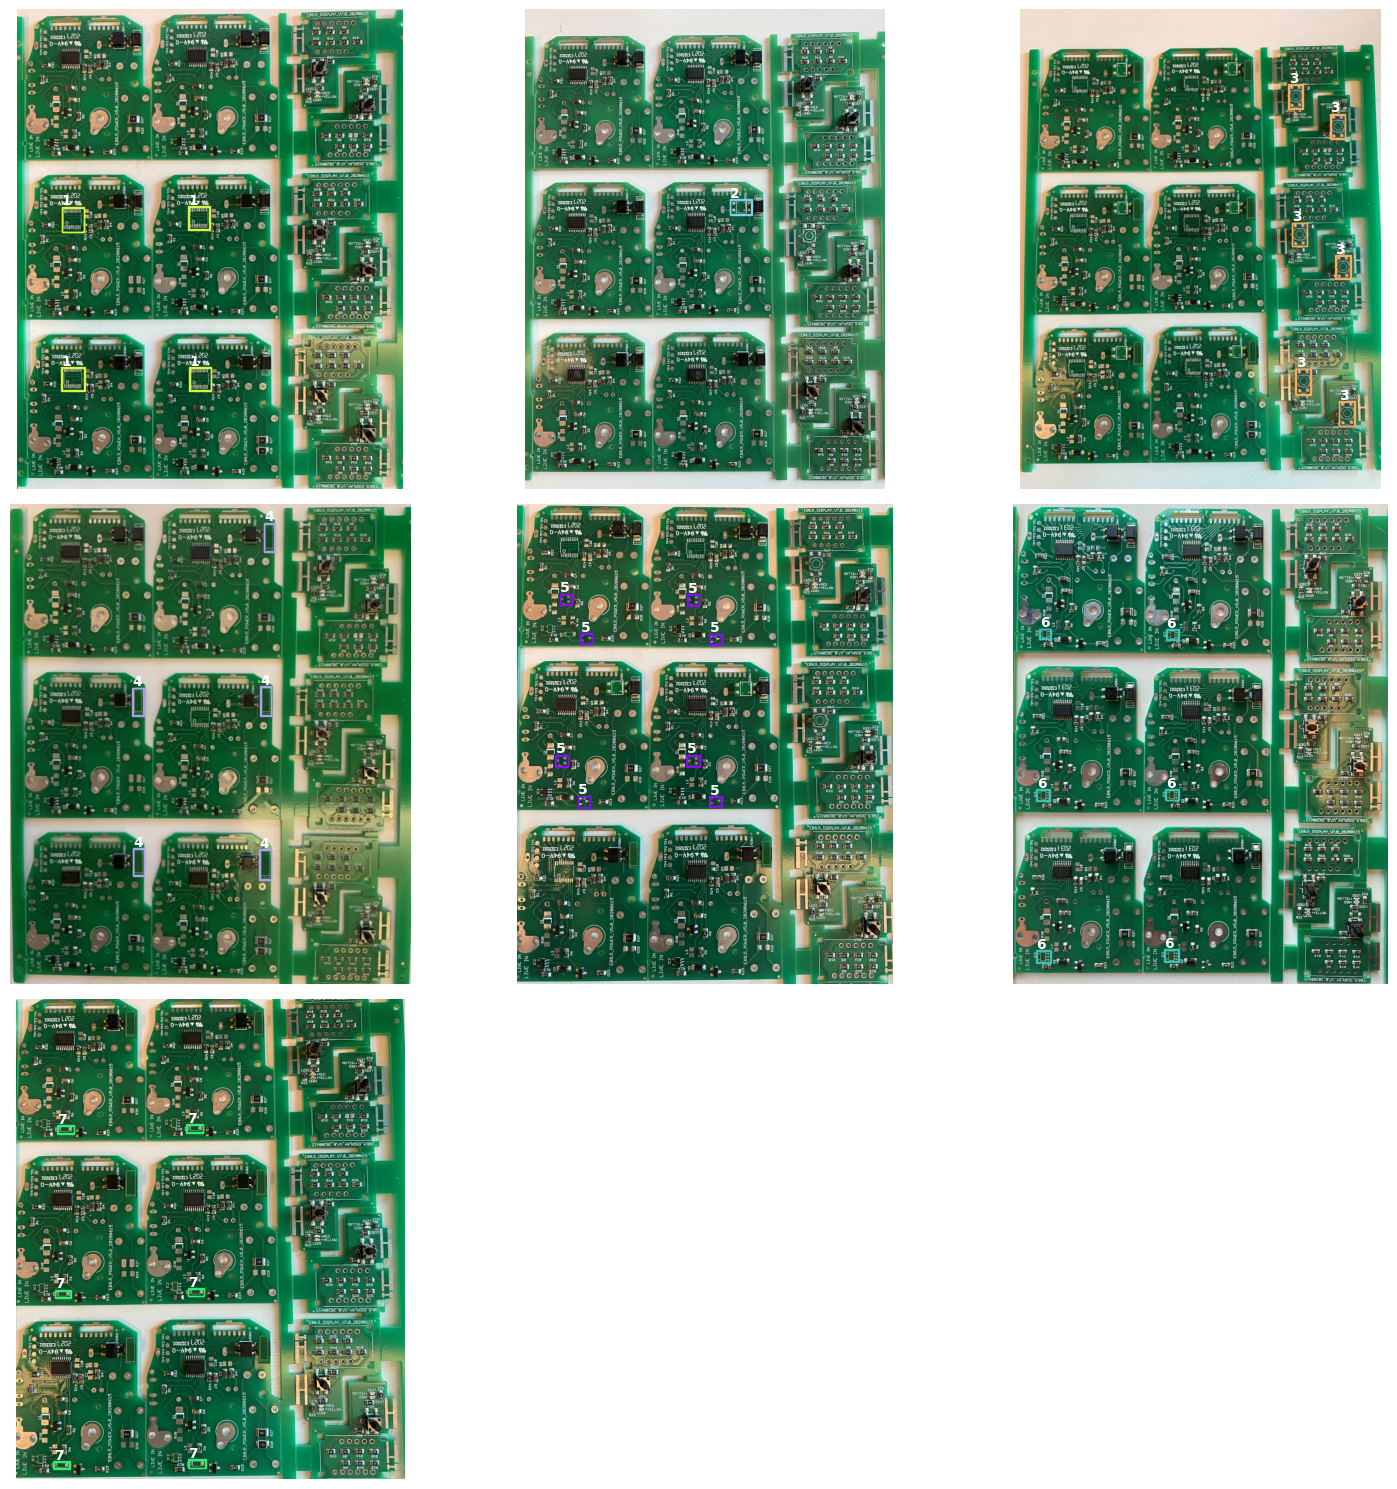

In [8]:
sample_yolo_dataset(COMPONENTS_DATA_DIR/"train",list(range(0, 8)),list(range(1,8)))